<a href="https://colab.research.google.com/github/divardhia/PCVK_Genap_2022/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
import glob
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Fungsi untuk load image dari drive lalu resize image menjadi setengah dari image asli, 
# kemudian kumpulan image dimasukkan ke dalam array
def load_image(array_image, path, color):
  for img in glob.glob(path):
    n = cv.imread(img, color)
    scale_percent = 50 # percent of original size
    width = int(n.shape[1] * scale_percent / 100)
    height = int(n.shape[0] * scale_percent / 100)
    dim = (width, height)
    n = cv.resize(n, dim)
    array_image.append(n)
  return array_image

In [4]:
train_daun1 = []
train_daun2 = []
train_daun3 = []
train_image = [train_daun1, train_daun2, train_daun3]

path_daun1 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Capillipes/*.jpg'
path_daun2 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Circinatum/*.jpg'
path_daun3 = '/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Castanea_Sativa/*.jpg'
path_image = [path_daun1, path_daun2, path_daun3]

for i in range(3):
  load_image(train_image[i], path_image[i], 0)

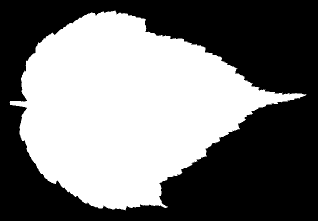

In [5]:
cv2_imshow(train_image[0][1])

In [6]:
# Ekstraksi data dengan deteksi tepi gambar daun menggunakan canny
edged_daun = train_image.copy()
for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    edged_daun[i][j] = cv.Canny(edged_daun[i][j], 30, 200)

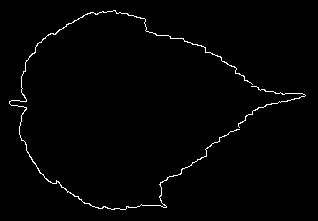

In [7]:
cv2_imshow(edged_daun[0][1])

In [8]:
# Menghitung area daun pada setiap dataset
area_daun1 = [0] * len(edged_daun[0])
area_daun2 = [0] * len(edged_daun[0])
area_daun3 = [0] * len(edged_daun[0])

for i in range(len(edged_daun)):
  for j in range(len(edged_daun[0])):
    for y in range(edged_daun[i][j].shape[0]):
      for x in range(edged_daun[i][j].shape[1]):
        if(edged_daun[i][j][y][x] > 0):
          if(i == 0):
            area_daun1[j] += 1
          elif(i == 1):
            area_daun2[j] += 1
          else:
            area_daun3[j] += 1

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Membuat data train dari data area bentuk daun
label1 = [0] * len(area_daun1)
label2 = [1] * len(area_daun2)
label3 = [2] * len(area_daun3)

data1 = np.stack((area_daun1, label1), axis=1)
data2 = np.stack((area_daun2, label2), axis=1)
data3 = np.stack((area_daun3, label3), axis=1)

df = pd.DataFrame(data1, columns=["Area", "Label"])
df1 = pd.DataFrame(data2, columns=["Area", "Label"])
df2 = pd.DataFrame(data3, columns=["Area", "Label"])

df = df.append(df1)
df = df.append(df2)

print("Data Train : ")
df = df.sample(frac=1).reset_index()
df

Data Train : 


,index,Area,Label
0,4,1516,1
1,9,1576,1
2,13,907,0
3,1,1591,1
4,2,2219,2
5,10,2316,2
6,12,1596,1
7,5,1416,1
8,3,1527,1
9,14,1230,1


In [11]:
# Split Train dan Test Data dengan pembagian 75% Train data dan 25% Test Data
X = df.iloc[:,1].values
X = X.reshape(-1,1)
Y = df.iloc[:,2].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [12]:
# Membuat model KNN dan fungsi untuk prediksi daun
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, Y_train)

def prediksi_daun_knn(area):
  prediction = model.predict(area)
  if(prediction == 0):
    prediksi = "Acer_Capillipes"
  elif(prediction == 1):
    prediksi = "Acer_Circinatum"
  else:
    prediksi = "Castanea_Sativa"
  return prediksi

Castanea_Sativa


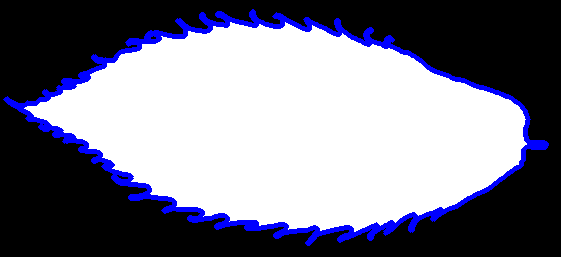

In [13]:
# Klasifikasi KNN

#image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Capillipes/acer_capillipes_01.ab.jpg')
#image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Acer_Circinatum/Acer_Circinatum_01.ab.jpg')
image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/Leaf_01/Castanea_Sativa/Castanea_Sativa_03.ab.jpg')

# resize gambar input
scale_percent = 50 # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv.resize(image, dim)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Menerapkan Canny Edge Detection
edged = cv.Canny(image_gray, 30, 200)

# Menerapkan fungsi findContours() openCV
contours, hierarchy = cv.findContours(edged, 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(image, contours, -1, (255, 0, 0), 3)

# Menghitung area input gambar
area = np.array([[0]])
for i in range(edged.shape[0]):
  for j in range(edged.shape[1]):
    if(edged[i,j] > 0):
      area[0][0] += 1

# Prediksi Bentuk Daun
print(prediksi_daun_knn(area))

cv2_imshow(image)